## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
import imageio as iio

## Segmentation in HSI Space

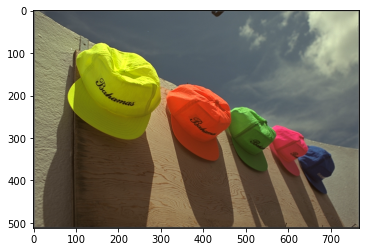

In [2]:
img = iio.imread('P4.png')
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure()
plt.imshow(img)
plt.show()

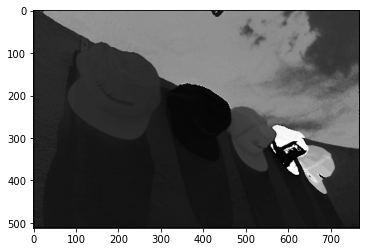

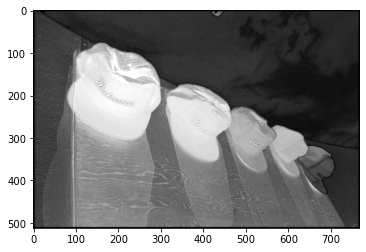

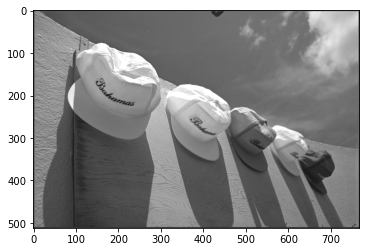

In [3]:
def scale(img):
    '''
    A function for scaling image between 0 and 255.
    '''
    return np.uint8((img-np.min(img))/(np.max(img)-np.min(img))*255)

HSI = rgb_to_hsv(img.copy()/255)

plt.figure()
plt.imshow(scale(HSI[:,:,0]), cmap='gray')
plt.show()

plt.figure()
plt.imshow(scale(HSI[:,:,1]), cmap='gray')
plt.show()

plt.figure()
plt.imshow(scale(HSI[:,:,2]), cmap='gray')
plt.show()

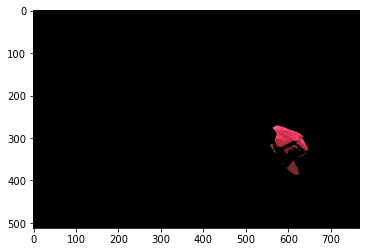

In [9]:
def mask_creator(img, HSI, t1, t2, ts):
    mask = np.zeros((img.shape[0], img.shape[1]))
    H = HSI[:,:,0]
    S = HSI[:,:,1]
    m = np.max(H)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if H[i,j] >= t1*m and H[i,j] <= t2*m and S[i,j] >= ts:
                mask[i,j] = 1
    return mask

def seg(img, t1, t2, ts):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    HSI = rgb_to_hsv(img.copy()/255)
    mask = mask_creator(img, HSI, t1, t2, ts)
    r1 = r * mask
    g1 = g * mask
    b1 = b * mask
    img1 = np.dstack((r1, g1, b1))
    return img1

img1 = seg(img, 0.7, 1, 0.5)
plt.figure()
plt.imshow(scale(img1))
plt.show()
iio.imwrite('pink_hsi.jpg', scale(img1))

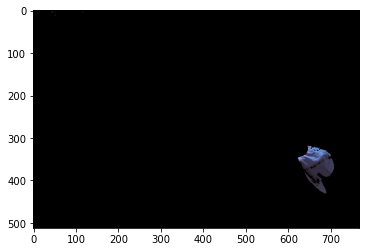

In [87]:
img2 = seg(img, 0.6, 0.9, 0.2)
plt.figure()
plt.imshow(scale(img2))
plt.show()
iio.imwrite('blue_hsi.jpg', scale(img2))

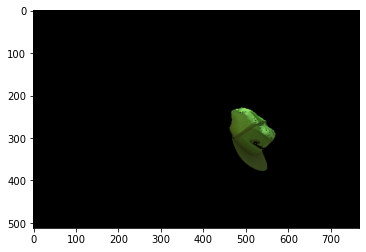

In [88]:
img3 = seg(img, 0.2, 0.35, 0.5)
plt.figure()
plt.imshow(scale(img3))
plt.show()
iio.imwrite('green_hsi.jpg', scale(img3))

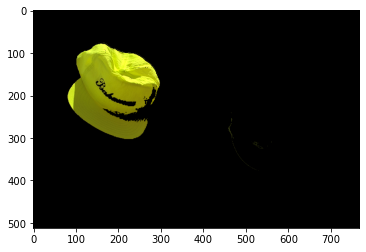

In [89]:
img4 = seg(img, 0.16, 0.2, 0.6)
plt.figure()
plt.imshow(scale(img4))
plt.show()
iio.imwrite('yellow_hsi.jpg', scale(img4))

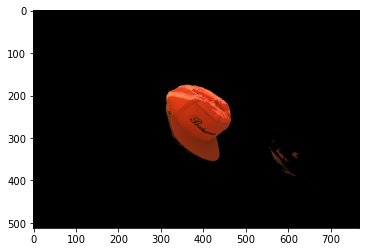

In [10]:
img5 = seg(img, 0.02, 0.06, 0.6)
plt.figure()
plt.imshow(scale(img5))
plt.show()
iio.imwrite('orange_hsi.jpg', scale(img5))

## Segmentation in RGB Space

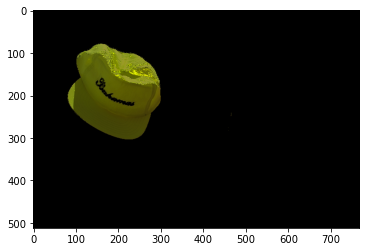

In [16]:
def seg_rgb(img, a, deltar, deltag, deltab):
    x, y = img.shape[0], img.shape[1]
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    mask = np.zeros(img.shape)
    for i in range(x):
        for j in range(y):
            if a[0]-deltar<=r[i,j]<=a[0]+deltar and a[1]-deltag<=g[i,j]<=a[1]+deltag and a[2]-deltab<=b[i,j]<=a[2]+deltab:
                for k in range(3):
                    mask[i,j,k] = 1
    return img.copy()*mask

img1_1 = seg_rgb(img, (140,150,20), 50, 60, 20)
img1_2 = seg_rgb(img, (230, 250, 50), 50, 70, 50)
img1 = np.uint8((img1_1.astype('float32')+img1_2.astype('float32'))/2)
plt.figure()
plt.imshow(scale(img1))
plt.show()
iio.imwrite('yellow_rgb.jpg', scale(img1))

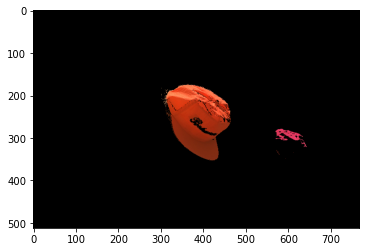

In [17]:
img2_1 = seg_rgb(img, (155, 45, 16), 47, 15, 10)
img2_2 = seg_rgb(img, (235, 90, 40), 30, 80, 70)
img2 = np.uint8((img2_1.astype('float32')+img2_2.astype('float32'))/2)
plt.figure()
plt.imshow(scale(img2))
plt.show()
iio.imwrite('orange_rgb.jpg', scale(img2))

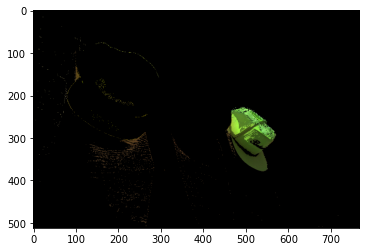

In [18]:
img3_1 = seg_rgb(img, (110, 200, 80), 40, 40, 40)
img3_2 = seg_rgb(img, (65, 85, 25), 30, 30, 10)
img3_3 = seg_rgb(img, (80, 120, 25), 25, 35, 40)
img3 = np.uint8((img3_1.astype('float32')+img3_2.astype('float32')+img3_3.astype('float32'))/3)
plt.figure()
plt.imshow(scale(img3))
plt.show()
iio.imwrite('green_rgb.jpg', scale(img3))

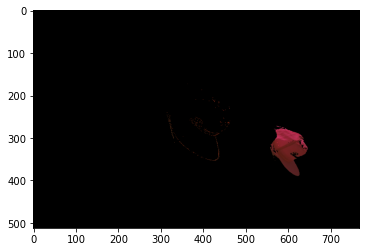

In [19]:
img4_1 = seg_rgb(img, (230, 57, 95), 60, 20, 50)
img4_2 = seg_rgb(img, (130, 45, 40), 40, 10, 15)
img4 = np.uint8((img4_1.astype('float32')+img4_2.astype('float32'))/2)
plt.figure()
plt.imshow(scale(img4))
plt.show()
iio.imwrite('pink_rgb.jpg', scale(img4))

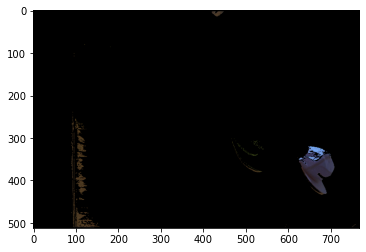

In [20]:
img5_1 = seg_rgb(img, (35, 30, 45), 15, 20, 30)
img5_2 = seg_rgb(img, (65, 85, 135), 10, 20, 30)
img5 = np.uint8((img5_1.astype('float32')+img5_2.astype('float32'))/2)
plt.figure()
plt.imshow(scale(img5))
plt.show()
iio.imwrite('blue_rgb.jpg', scale(img5))